# ZEE5 PROJECT REPORT ---- Arathi. M

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [58]:
movies=pd.read_csv('zee-movies.dat',encoding='ISO-8859-1',delimiter='::')
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [4]:
movies.describe()

,Movie ID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [59]:
movies.rename(columns={'Movie ID':'MovieID'},inplace=True)

• Titles are identical to titles provided by the IMDB (including year of release)

• Genres are pipe-separated and are selected from the following genres:
    
        * Action
        
        * Adventure
        
        * Animation 
        
        * Children's
        
        * Comedy
        
        * Crime
        
        * Documentary
        
        * Drama
        
        * Fantasy
        
        * Film-Noir
        
        * Horror
        
        * Musical
        
        * Mystery
        
        * Romance
        
        * Sci-Fi
        
        * Thriller
        
        * War
        
        * Western
        

In [5]:
ratings=pd.read_csv('zee-ratings.dat', encoding='ISO-8859-1',delimiter='::')

ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [7]:
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [8]:
users=pd.read_csv('zee-users (2).dat', encoding='ISO-8859-1',delimiter='::')
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [10]:
users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


• Gender is denoted by a "M" for male and "F" for female

• Age is chosen from the following ranges:
    
     1: "Under 18"
            
     18: "18-24"
        
     25: "25-34"
        
     35: "35-44"
        
     45: "45-49"
        
     50: "50-55"
        
     56: "56+"

• Occupation is chosen from the following choices:
    
     0 : "other" or not specified
            
     1 : "academic/educator"
        
     2 : "artist"
        
     3 : "clerical/admin"
        
     4 : "college/grad student"
        
     5 : "customer service"
        
     6 : "doctor/health care"
        
     7 : "executive/managerial"
        
     8 : "farmer"
        
     9 : "homemaker"
        
     10: "K-12 student"
        
     11: "lawyer"
        
     12: "programmer"
        
     13: "retired"
        
     14: "sales/marketing"
        
     15: "scientist"
        
     16: "self-employed"
        
     17: "technician/engineer"
        
     18: "tradesman/craftsman"
        
     19: "unemployed"
        
     20: "writer"
    

## EDA & DATA VISUALIZATION

In [250]:
comb_data= ratings.merge(movies,on='MovieID',how='left')
comb_data= comb_data.merge(users, on='UserID',how='left')
comb_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Relese_year,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest,Drama,1975,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach,Animation|Children's|Musical,1996,F,1,10,48067
2,1,914,3,978301968,My Fair Lady,Musical|Romance,1964,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich,Drama,2000,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A",Animation|Children's|Comedy,1998,F,1,10,48067


In [251]:
comb_data['hour'] = comb_data['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)
comb_data.drop('Timestamp',axis=1,inplace=True)
comb_data.head()

,UserID,MovieID,Rating,Title,Genres,Relese_year,Gender,Age,Occupation,Zip-code,hour
0,1,1193,5,One Flew Over the Cuckoo's Nest,Drama,1975,F,1,10,48067,3
1,1,661,3,James and the Giant Peach,Animation|Children's|Musical,1996,F,1,10,48067,4
2,1,914,3,My Fair Lady,Musical|Romance,1964,F,1,10,48067,4
3,1,3408,4,Erin Brockovich,Drama,2000,F,1,10,48067,3
4,1,2355,5,"Bug's Life, A",Animation|Children's|Comedy,1998,F,1,10,48067,5


In [33]:
# comb_data['Genres'] = comb_data['Genres'].str.split('|')

# comb_data=comb_data.explode('Genres')
# comb_data

,UserID,MovieID,Rating,Title,Genres,Relese_year,Gender,Age,Occupation,Zip-code,hour
0,1,1193,5,One Flew Over the Cuckoo's Nest,Drama,1975,F,1,10,48067,3
1,1,661,3,James and the Giant Peach,Animation,1996,F,1,10,48067,4
1,1,661,3,James and the Giant Peach,Children's,1996,F,1,10,48067,4
1,1,661,3,James and the Giant Peach,Musical,1996,F,1,10,48067,4
2,1,914,3,My Fair Lady,Musical,1964,F,1,10,48067,4
...,...,...,...,...,...,...,...,...,...,...,...
1000207,6040,1096,4,Sophie's Choice,Drama,1982,M,25,6,11106,7
1000208,6040,1097,4,E.T. the Extra-Terrestrial,Children's,1982,M,25,6,11106,7
1000208,6040,1097,4,E.T. the Extra-Terrestrial,Drama,1982,M,25,6,11106,7
1000208,6040,1097,4,E.T. the Extra-Terrestrial,Fantasy,1982,M,25,6,11106,7


## Users of which age group have watched and rated the most number of movies?

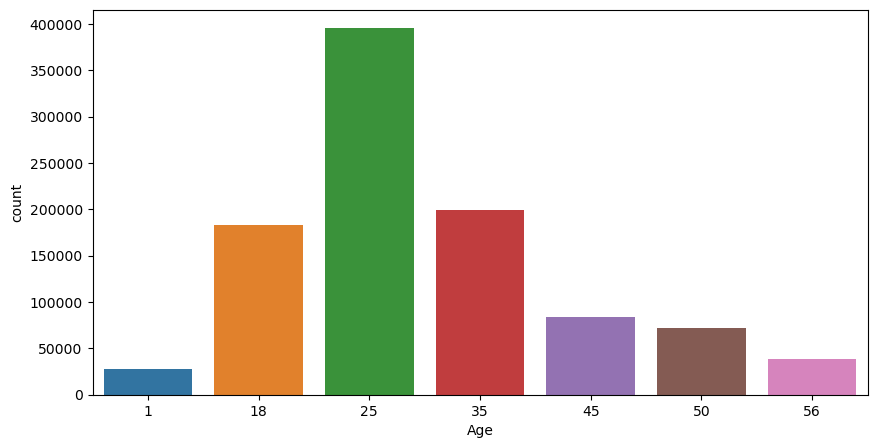

In [252]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=comb_data)
plt.show()

* From the figure we can understand that users belongs to the age group 25 that is age between 25-34 are watched most number of   movies, the count is 800000

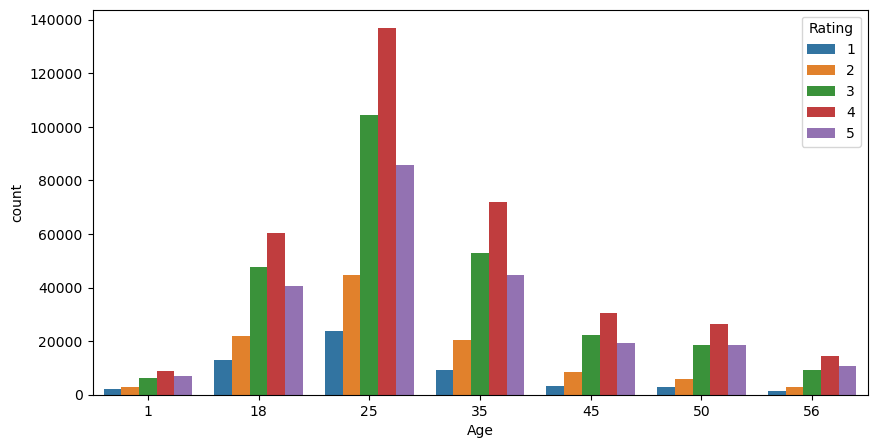

In [253]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=comb_data,hue='Rating')
plt.show()

* From this figure 
   * All age groups mostly give rating 4 to movies.
   * Age group 25 is the group who give most number of rating 5 to movies. 

## Users belonging to which profession have watched and rated the most movies?

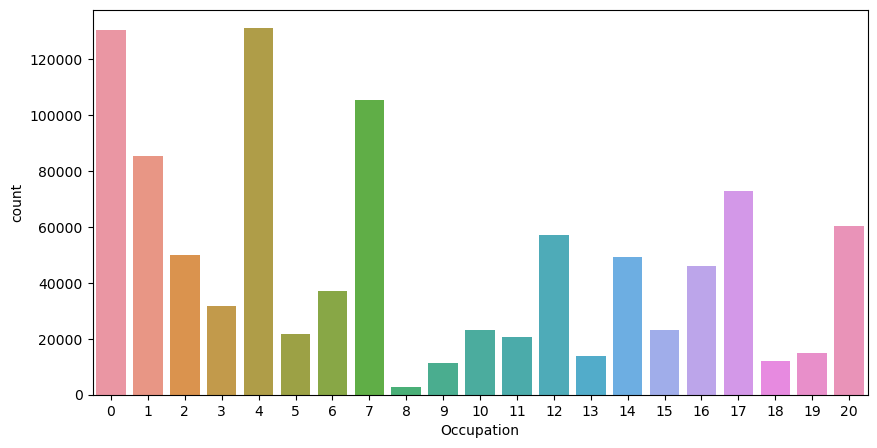

In [254]:
plt.figure(figsize=(10,5))
sns.countplot(x='Occupation',data=comb_data)
plt.show()

* From the figure we can understand that users belongs to the occupation category 4 that is "college/grad student" are watched
  most number of movies, the count is 277745.
    
* Users of category 8 that is "farmer" are watched least number of movies.

In [255]:
comb_data.Occupation.value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

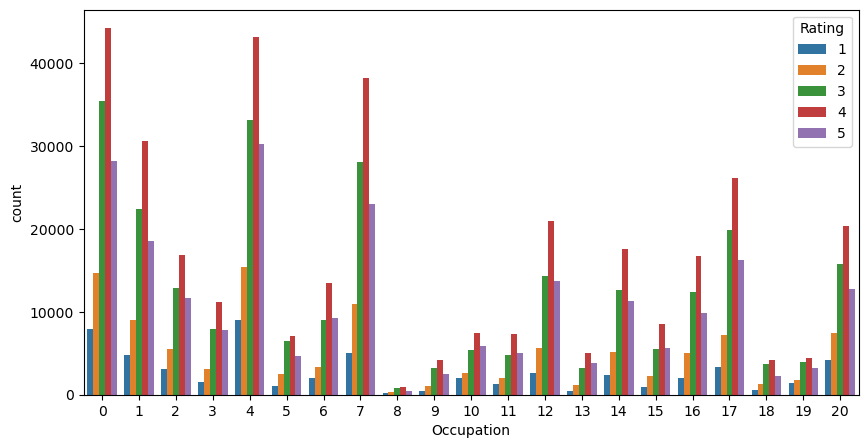

In [256]:
plt.figure(figsize=(10,5))
sns.countplot(x='Occupation',data=comb_data,hue='Rating')
plt.show()

* Most of the users from all occupation category give rating 4 to movies. 

## Most of the users in our dataset who’ve rated the movies are Male 

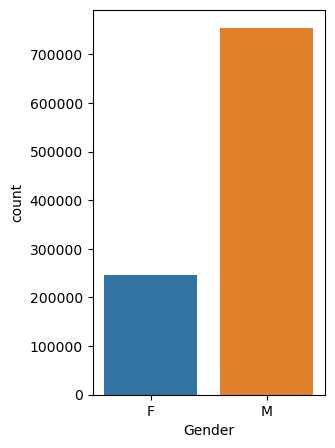

In [257]:
plt.figure(figsize=(3,5))
sns.countplot(x='Gender',data=comb_data)
plt.show()

* Most of the users who watched movies are males.

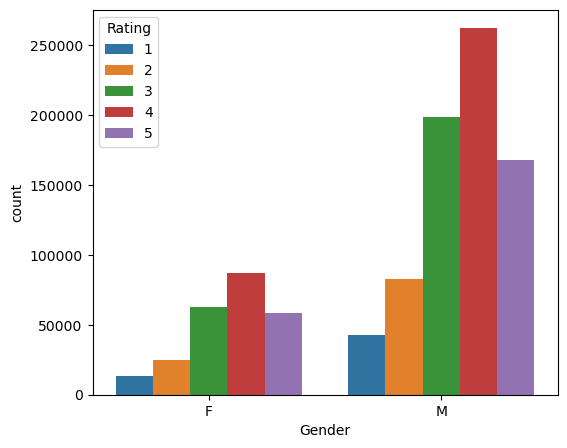

In [258]:
plt.figure(figsize=(6,5))
sns.countplot(x='Gender',data=comb_data,hue='Rating')
plt.show()

## Most of the movies present in our dataset were released in which year 

In [274]:
movies.Relese_year.value_counts().head(30)

1996    327
1995    321
1998    305
1997    298
1999    265
1994    234
2000    153
1993    152
1986     97
1992     96
1990     73
1987     67
1988     67
1985     62
1984     58
1989     56
1991     55
1982     43
1980     39
1981     39
1983     35
1979     30
1978     28
1974     25
1967     24
1973     24
1971     23
1968     21
1972     20
1958     20
Name: Relese_year, dtype: int64

* Most of the movies were released in 1996,1995,1998,1997 . Which means that most of the films were released in 1990s decade

## The movie with maximum no. of viewers

In [260]:
comb_data.Title.value_counts()

American Beauty                                    3428
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
                                                   ... 
Project Moon Base                                     1
Ring, The                                             1
Eden                                                  1
Aiqing wansui                                         1
Five Wives, Three Secretaries and Me                  1
Name: Title, Length: 3657, dtype: int64

* 'Star Wars: Episode V - The Empire Strikes Back'  is the most watched movie 

## Which genre have high average rating

In [268]:
mov=movies.copy()
# mov['Genres'] = mov['Genres'].str.split('|')
# mov=mov.explode('Genres')
mov

,MovieID,Title,Genres,Relese_year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [269]:
combi_data= ratings.merge(mov,on='MovieID',how='left')
combi_data= comb_data.merge(users, on='UserID',how='left')
combi_data['Genres'] = combi_data['Genres'].str.split('|')
combi_data=combi_data.explode('Genres')
combi_data.head()

,UserID,MovieID,Rating,Title,Genres,Relese_year,Gender_x,Age_x,Occupation_x,Zip-code_x,hour,Gender_y,Age_y,Occupation_y,Zip-code_y
0,1,1193,5,One Flew Over the Cuckoo's Nest,Drama,1975,F,1,10,48067,3,F,1,10,48067
1,1,661,3,James and the Giant Peach,Animation,1996,F,1,10,48067,4,F,1,10,48067
1,1,661,3,James and the Giant Peach,Children's,1996,F,1,10,48067,4,F,1,10,48067
1,1,661,3,James and the Giant Peach,Musical,1996,F,1,10,48067,4,F,1,10,48067
2,1,914,3,My Fair Lady,Musical,1964,F,1,10,48067,4,F,1,10,48067


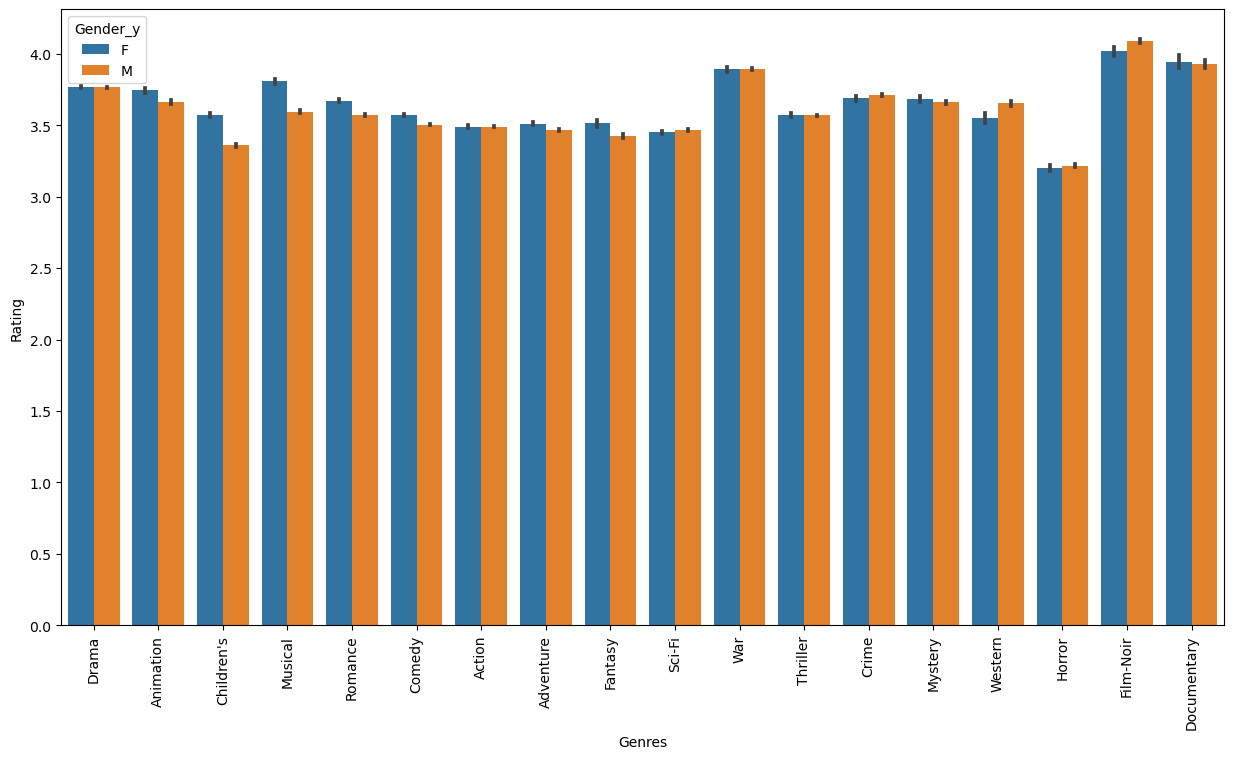

In [270]:
plt.figure(figsize=(15,8))
sns.barplot(x='Genres',y='Rating',data=combi_data,hue='Gender_y')
plt.xticks(rotation=90)
plt.show()

* Film-Noir get high average rating.

* Horror get least average rating.


## Ratings

In [44]:
r = ratings.copy()
r['hour'] = r['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)
r.drop('Timestamp',axis=1,inplace=True)
r.head()


,UserID,MovieID,Rating,hour
0,1,1193,5,3
1,1,661,3,4
2,1,914,3,4
3,1,3408,4,3
4,1,2355,5,5


In [45]:
r.groupby('UserID').Rating.mean().reset_index()

,UserID,Rating
0,1,4.188679
1,2,3.713178
2,3,3.901961
3,4,4.190476
4,5,3.146465
...,...,...
6035,6036,3.302928
6036,6037,3.717822
6037,6038,3.800000
6038,6039,3.878049


In [46]:
r = r.merge(r.groupby('UserID').Rating.mean().reset_index(), on='UserID')
r = r.merge(r.groupby('UserID').hour.mean().reset_index(), on='UserID')
r.head(2)


,UserID,MovieID,Rating_x,hour_x,Rating_y,hour_y
0,1,1193,5,3,4.188679,3.792453
1,1,661,3,4,4.188679,3.792453


In [47]:
r.columns=['UserID','MovieID','Rating','hour','Avg_Rating_of_each_user','Avg_hour_of_each_user']

r

,UserID,MovieID,Rating,hour,Avg_Rating_of_each_user,Avg_hour_of_each_user
0,1,1193,5,3,4.188679,3.792453
1,1,661,3,4,4.188679,3.792453
2,1,914,3,4,4.188679,3.792453
3,1,3408,4,3,4.188679,3.792453
4,1,2355,5,5,4.188679,3.792453
...,...,...,...,...,...,...
1000204,6040,1091,1,8,3.577713,10.826979
1000205,6040,1094,5,4,3.577713,10.826979
1000206,6040,562,5,4,3.577713,10.826979
1000207,6040,1096,4,7,3.577713,10.826979


## MOVIES

In [60]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [61]:
movies['Relese_year']=movies.Title.str.split('(')

In [62]:
movies['Title']=movies['Relese_year'].apply(lambda x: x[0])

In [63]:
movies['Relese_year']=movies['Relese_year'].apply(lambda x: x[1].replace(')',''))

In [64]:
movies

,MovieID,Title,Genres,Relese_year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [65]:
m = movies.copy()

In [66]:
m.columns=['MovieID','Title','Genres','Relese_year']
m

,MovieID,Title,Genres,Relese_year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [67]:
m['Genres'] = m['Genres'].str.split('|')

In [68]:
m=m.explode('Genres')

In [69]:
m=m.pivot(index='MovieID',columns='Genres',values='Title')
m

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,NaN,NaN,Toy Story,Toy Story,Toy Story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Jumanji,NaN,Jumanji,NaN,NaN,NaN,NaN,Jumanji,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Grumpier Old Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grumpier Old Men,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Waiting to Exhale,NaN,NaN,Waiting to Exhale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Father of the Bride Part II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,NaN,NaN,NaN,NaN,Meet the Parents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Requiem for a Dream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tigerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
m=~m.isna()

In [71]:
m

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3949,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3950,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [72]:
m=m.astype('int')
m

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## USERS

In [164]:
u = users.copy()

In [165]:
u = u.merge(r.groupby('UserID').Rating.mean().reset_index(), on='UserID',how='left')


In [166]:
u = u.merge(r.groupby('UserID').hour.mean().reset_index(), on='UserID',how='left')
u

,UserID,Gender,Age,Occupation,Zip-code,Rating,hour
0,1,F,1,10,48067,4.188679,3.792453
1,2,M,56,16,70072,3.713178,2.968992
2,3,M,25,15,55117,3.901961,2.215686
3,4,M,45,7,02460,4.190476,1.000000
4,5,M,25,20,55455,3.146465,11.656566
...,...,...,...,...,...,...,...
6035,6036,F,25,15,32603,3.302928,10.869369
6036,6037,F,45,1,76006,3.717822,7.000000
6037,6038,F,56,1,14706,3.800000,5.550000
6038,6039,F,45,0,01060,3.878049,5.512195


In [167]:
u.columns=['UserID','Gender','Age','Occupation','Zip-code','Average_Rating','Average_hour']
u=u.set_index('UserID')
u

,Gender,Age,Occupation,Zip-code,Average_Rating,Average_hour
UserID,,,,,,
1,F,1,10,48067,4.188679,3.792453
2,M,56,16,70072,3.713178,2.968992
3,M,25,15,55117,3.901961,2.215686
4,M,45,7,02460,4.190476,1.000000
5,M,25,20,55455,3.146465,11.656566
...,...,...,...,...,...,...
6036,F,25,15,32603,3.302928,10.869369
6037,F,45,1,76006,3.717822,7.000000
6038,F,56,1,14706,3.800000,5.550000


In [168]:
u['Zip-code']=u['Zip-code'].apply(lambda x: x.replace('-',''))
#u=u[~ u['Zip-code'].str.contains('-')]

In [169]:
u['Age'].replace({1: "Under 18",
                 18: "18-24",
                 25: "25-34",
                 35: "35-44",
                 45: "45-49",
                 50: "50-55",
                 56: "56+"},inplace=True)
u['Occupation'].replace({0: "other" or not specified,
                        1: "academic/educator",
                        2: "artist",
                        3: "clerical/admin",
                        4: "college/grad student",
                        5: "customer service",
                        6: "doctor/health care",
                        7: "executive/managerial",
                        8: "farmer",
                        9: "homemaker",
                        10: "K-12 student",
                        11: "lawyer",
                        12: "programmer",
                        13: "retired",
                        14: "sales/marketing",
                        15: "scientist",
                        16: "self-employed",
                        17: "technician/engineer",
                        18: "tradesman/craftsman",
                        19: "unemployed",
                        20: "writer"},inplace=True)
u

,Gender,Age,Occupation,Zip-code,Average_Rating,Average_hour
UserID,,,,,,
1,F,Under 18,K-12 student,48067,4.188679,3.792453
2,M,56+,self-employed,70072,3.713178,2.968992
3,M,25-34,scientist,55117,3.901961,2.215686
4,M,45-49,executive/managerial,02460,4.190476,1.000000
5,M,25-34,writer,55455,3.146465,11.656566
...,...,...,...,...,...,...
6036,F,25-34,scientist,32603,3.302928,10.869369
6037,F,45-49,academic/educator,76006,3.717822,7.000000
6038,F,56+,academic/educator,14706,3.800000,5.550000


In [170]:
u=pd.get_dummies(u,columns=['Gender'],drop_first=True)
u=pd.get_dummies(u,columns=['Age'])
u=pd.get_dummies(u,columns=['Occupation'])
u

,Zip-code,Average_Rating,Average_hour,Gender_M,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,Age_56+,...,Occupation_other,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
UserID,,,,,,,,,,,,,,,,,,,,,
1,48067,4.188679,3.792453,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70072,3.713178,2.968992,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,55117,3.901961,2.215686,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,02460,4.190476,1.000000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,55455,3.146465,11.656566,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,32603,3.302928,10.869369,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6037,76006,3.717822,7.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,14706,3.800000,5.550000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [171]:
scaler = StandardScaler()
u = pd.DataFrame(scaler.fit_transform(u), columns=u.columns, index=u.index)
u.head()

,Zip-code,Average_Rating,Average_hour,Gender_M,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,Age_56+,...,Occupation_other,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
UserID,,,,,,,,,,,,,,,,,,,,,
1,-0.090248,1.131261,-0.909947,-1.591927,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
2,-0.089900,0.024380,-1.037952,0.628170,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,3.85937,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,4.905328,-0.301075,-0.108283,-0.109838,-0.220892
3,-0.090136,0.463832,-1.155052,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,6.398785,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
4,-0.090970,1.135444,-1.344027,0.628170,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
5,-0.090131,-1.294827,0.312509,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,4.527103


In [172]:
u

,Zip-code,Average_Rating,Average_hour,Gender_M,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,Age_56+,...,Occupation_other,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
UserID,,,,,,,,,,,,,,,,,,,,,
1,-0.090248,1.131261,-0.909947,-1.591927,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
2,-0.089900,0.024380,-1.037952,0.628170,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,3.85937,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,4.905328,-0.301075,-0.108283,-0.109838,-0.220892
3,-0.090136,0.463832,-1.155052,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,6.398785,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
4,-0.090970,1.135444,-1.344027,0.628170,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
5,-0.090131,-1.294827,0.312509,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,4.527103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,-0.090493,-0.930609,0.190141,-1.591927,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,6.398785,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
6037,-0.089806,0.035189,-0.411342,-1.591927,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
6038,-0.090776,0.226486,-0.636741,-1.591927,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,3.85937,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892


In [174]:
m.head(1)

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [175]:
r.head(1)

,UserID,MovieID,Rating,hour,Avg_Rating_of_each_user,Avg_hour_of_each_user
0,1,1193,5,3,4.188679,3.792453


## GBR

In [176]:
X = ratings[['MovieID', 'UserID', 'Rating']].copy()
X

,MovieID,UserID,Rating
0,1193,1,5
1,661,1,3
2,914,1,3
3,3408,1,4
4,2355,1,5
...,...,...,...
1000204,1091,6040,1
1000205,1094,6040,5
1000206,562,6040,5
1000207,1096,6040,4


In [177]:
X = X.merge(u.reset_index(), on='UserID', how='left')


In [178]:
X = X.merge(m.reset_index(), on='MovieID', how='left')
X.head()

,MovieID,UserID,Rating,Zip-code,Average_Rating,Average_hour,Gender_M,Age_18-24,Age_25-34,Age_35-44,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,1,5,-0.090248,1.131261,-0.909947,-1.591927,-0.472668,-0.728999,-0.496117,...,0,0,0,0,0,0,0,0,0,0
1,661,1,3,-0.090248,1.131261,-0.909947,-1.591927,-0.472668,-0.728999,-0.496117,...,0,0,0,1,0,0,0,0,0,0
2,914,1,3,-0.090248,1.131261,-0.909947,-1.591927,-0.472668,-0.728999,-0.496117,...,0,0,0,1,0,1,0,0,0,0
3,3408,1,4,-0.090248,1.131261,-0.909947,-1.591927,-0.472668,-0.728999,-0.496117,...,0,0,0,0,0,0,0,0,0,0
4,2355,1,5,-0.090248,1.131261,-0.909947,-1.591927,-0.472668,-0.728999,-0.496117,...,0,0,0,0,0,0,0,0,0,0


In [179]:
X = X.drop(columns = ['MovieID', 'UserID'])
y = X.pop('Rating')

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [181]:
# X.dropna(axis=0,subset=['Age','Occupation','Zip-code','Average_Rating','Average_hour'],inplace=True)

In [182]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([3.31398721, 3.25027101, 4.34684561, ..., 2.90000557, 4.19019332,
       3.38368827])

## User - Item Matrix

In [183]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [184]:
user_item=ratings.pivot(index='UserID',columns='MovieID',values='Rating')
user_item

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
user_item=user_item.fillna(0)
user_item=user_item.astype('int')
user_item

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0,0,2,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


####### !pip install cmfrec

In [186]:
rm_raw=ratings[['UserID','MovieID','Rating']].copy()

In [187]:
rm_raw.columns=['UserId', 'ItemId', 'Rating']
rm_raw.head()

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [188]:
from cmfrec import CMF

In [189]:
model=CMF(k=4,lambda_=0.1,verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [190]:
model.A_

array([[-0.13501133, -0.45694068, -0.30065995,  0.27602646],
       [ 0.04856059, -0.4363677 , -0.2665689 ,  0.07963227],
       [ 0.12635869, -0.07928522, -0.49258402,  0.3659336 ],
       ...,
       [ 0.96008754,  0.7576343 , -0.56947124, -0.01273226],
       [ 0.14758456,  0.0053354 , -0.05215119, -0.00872553],
       [ 0.20169811,  0.43512502,  0.36319798, -0.19664922]],
      dtype=float32)

In [191]:
model.B_

array([[-0.23253448,  0.07793564,  1.4407943 ,  0.74440426],
       [ 0.56410843,  0.20561697,  1.4131116 ,  0.7586507 ],
       [ 1.3488133 , -1.2926788 ,  0.30267736, -0.8987881 ],
       ...,
       [ 0.48714122, -0.18031494,  0.5764594 , -0.03807474],
       [ 0.11228458,  0.13748117,  0.02289846, -0.5264363 ],
       [-0.04892477, -0.08194821,  0.05004622,  0.05516713]],
      dtype=float32)

In [192]:
user_matrix=model.A_
Item_matrix=model.B_.T

In [193]:
predicted_matrix=np.dot(user_matrix,Item_matrix)

In [194]:
predicted_matrix

array([[-0.23193106, -0.3855742 ,  0.0694802 , ..., -0.16720425,
        -0.23017544,  0.04423156],
       [-0.37009296, -0.37860966,  0.47732556, ..., -0.05435864,
        -0.10256507,  0.02443605],
       [-0.47287166, -0.36348277, -0.20506619, ..., -0.22203667,
        -0.20063224, -0.00414925],
       ...,
       [-0.9941757 , -0.11700979,  0.1546786 , ...,  0.00329317,
         0.20562619, -0.13826111],
       [-0.11553714,  0.00403567,  0.18422447, ...,  0.04120165,
         0.02070424, -0.0107491 ],
       [ 0.36391708,  0.5672999 , -0.00374606, ...,  0.2366522 ,
         0.19430904, -0.03819763]], dtype=float32)

In [195]:
n=user_item.shape[0]*user_item.shape[1]
n

22384240

In [196]:
RMSE = np.sqrt(sum((predicted_matrix - user_item)**2) / n)
RMSE

0.574798139727525

In [197]:
MAPE = (sum(abs((user_item-predicted_matrix)/user_item))/n)*100
MAPE

33.039290143422335

# Recommendation for Target user = userid

In [198]:
UI_matrix=user_item.copy()


In [199]:
user_matrix_index=list(UI_matrix.index)
user_matrix_index

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [200]:
# Create a DataFrame from the user matrix
df_user_matrix = pd.DataFrame(user_matrix,index=user_matrix_index)
df_user_matrix = df_user_matrix.rename_axis('UserID')
df_user_matrix

,0,1,2,3
UserID,,,,
1,-0.135011,-0.456941,-0.300660,0.276026
2,0.048561,-0.436368,-0.266569,0.079632
3,0.126359,-0.079285,-0.492584,0.365934
4,0.051456,0.074657,0.555143,-0.339664
5,0.116942,0.141078,0.154465,0.223396
...,...,...,...,...
6036,0.039411,0.101709,0.289752,-0.119024
6037,-0.046672,-0.098688,0.066346,-0.030853
6038,0.960088,0.757634,-0.569471,-0.012732


In [201]:
item_matrix_columns=list(UI_matrix.columns)
len(item_matrix_columns)

3706

In [202]:
# Create a DataFrame from the item matrix
df_item_matrix = pd.DataFrame(Item_matrix,columns=item_matrix_columns)
df_item_matrix

,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,-0.232534,0.564108,1.348813,0.363498,-0.027188,-0.050081,-0.880496,-0.364838,0.743583,0.804957,...,-0.063762,0.203772,0.059804,-0.006151,0.039858,-0.652791,0.048387,0.487141,0.112285,-0.048925
1,0.077936,0.205617,-1.292679,-0.626360,-0.191250,0.221835,-0.949604,-0.293072,-2.023656,-0.843362,...,-0.426088,1.361704,-0.047556,-0.044346,-0.013106,-1.648988,-0.024112,-0.180315,0.137481,-0.081948
2,1.440794,1.413112,0.302677,-0.933864,0.367872,0.177240,0.169803,0.731771,1.029669,0.921791,...,0.120568,-0.385316,-0.002567,0.003411,-0.036203,0.190640,-0.067781,0.576459,0.022898,0.050046
3,0.744404,0.758651,-0.898788,-1.032937,-0.644360,0.009787,-0.877411,0.066378,-0.370365,-0.481842,...,0.029480,-0.094213,-0.141797,0.009383,0.037892,0.884107,0.183502,-0.038075,-0.526436,0.055167


# Recommendation for Target user = userid5

In [203]:
target_vector=df_user_matrix.loc[5]
target_vector=target_vector.values
target_vector

array([0.11694234, 0.14107752, 0.15446462, 0.22339557], dtype=float32)

# 5 similar users of Targetuser

In [204]:
def euclidean_distance(x, y):
    distance = np.sqrt(sum((x - y) ** 2))
    return distance

In [205]:
similar_users=[]
for i in range(len(df_user_matrix)+1):
    if i==0:
        continue
    vector=df_user_matrix.loc[i]
    if np.array_equal(vector, target_vector):
        continue
    similar_users.append((vector,euclidean_distance(target_vector,vector)))
similar_users=pd.DataFrame(similar_users)
similar_users

,0,1
0,0 -0.135011 1 -0.456941 2 -0.300660 3 ...,0.794364
1,0 0.048561 1 -0.436368 2 -0.266569 3 ...,0.732159
2,0 0.126359 1 -0.079285 2 -0.492584 3 ...,0.698310
3,0 0.051456 1 0.074657 2 0.555143 3 ...,0.697337
4,0 0.452117 1 -0.011390 2 -0.416557 3 ...,0.783077
...,...,...
6034,0 0.039411 1 0.101709 2 0.289752 3 ...,0.378305
6035,0 -0.046672 1 -0.098688 2 0.066346 3 ...,0.395808
6036,0 0.960088 1 0.757634 2 -0.569471 3 ...,1.292623
6037,0 0.147585 1 0.005335 2 -0.052151 3 ...,0.340493


In [206]:
similar_users.columns=['vectors','distance']
similar_users=similar_users.sort_values('distance', ascending=True)
similar_users


,vectors,distance
1647,0 0.167419 1 0.146826 2 0.151564 3 ...,0.050891
5221,0 0.093401 1 0.106302 2 0.120948 3 ...,0.057692
5962,0 0.152804 1 0.166098 2 0.113780 3 ...,0.064554
2878,0 0.115268 1 0.089392 2 0.115231 3 ...,0.065410
625,0 0.117114 1 0.172766 2 0.126014 3 ...,0.076385
...,...,...
5326,0 0.204585 1 2.117452 2 1.112104 3 ...,3.166709
1081,0 -0.043062 1 -2.100517 2 -1.252091 3 ...,3.626645
1100,0 1.420188 1 -1.236123 2 -2.106603 3 ...,3.724528
5002,0 0.764543 1 -1.873220 2 -1.670552 3 ...,3.867923


In [207]:
five_similar_users=similar_users.head(5)
five_similar_users

,vectors,distance
1647,0 0.167419 1 0.146826 2 0.151564 3 ...,0.050891
5221,0 0.093401 1 0.106302 2 0.120948 3 ...,0.057692
5962,0 0.152804 1 0.166098 2 0.113780 3 ...,0.064554
2878,0 0.115268 1 0.089392 2 0.115231 3 ...,0.065410
625,0 0.117114 1 0.172766 2 0.126014 3 ...,0.076385


In [208]:
five_similar_users['vectors'].loc[1647]

0    0.167419
1    0.146826
2    0.151564
3    0.224157
Name: 1649, dtype: float32

In [209]:
v=list(five_similar_users.index)
v

[1647, 5221, 5962, 2878, 625]

In [210]:
concat=[]
for i in v:
    rating=((df_item_matrix.T)*(five_similar_users['vectors'].loc[i ])).sum(axis=1).reset_index()
    rating.columns=['items','rating']
    concat.append(rating)
result = pd.concat(concat, ignore_index=True)
result=result.sort_values('rating', ascending=False)
result

,items,rating
17808,3204,2.510944
6690,3204,2.182752
2984,3204,2.179577
15637,869,2.114183
2982,3202,2.024684
...,...,...
5555,2029,-1.451487
12967,2029,-1.480472
9261,2029,-1.635605
16673,2029,-1.769336


In [211]:
movies

,MovieID,Title,Genres,Relese_year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [212]:
result1=result.merge(movies, left_on='items',right_on='MovieID', how='left')
result1.drop(['Genres','Relese_year','items'],axis=1,inplace=True)
result1

,rating,MovieID,Title
0,2.510944,3204,"Boys from Brazil, The"
1,2.182752,3204,"Boys from Brazil, The"
2,2.179577,3204,"Boys from Brazil, The"
3,2.114183,869,Kansas City
4,2.024684,3202,Even Dwarfs Started Small
...,...,...,...
18525,-1.451487,2029,Billy's Hollywood Screen Kiss
18526,-1.480472,2029,Billy's Hollywood Screen Kiss
18527,-1.635605,2029,Billy's Hollywood Screen Kiss
18528,-1.769336,2029,Billy's Hollywood Screen Kiss


In [213]:
top_movies=list(result1['Title'].unique())
top_movies

['Boys from Brazil, The ',
 'Kansas City ',
 'Even Dwarfs Started Small ',
 'Bossa Nova ',
 'Last September, The ',
 'Daughters of the Dust ',
 'Emperor and the Assassin, The ',
 "Wes Craven's New Nightmare ",
 'My Son the Fanatic ',
 'Crimson Pirate, The ',
 'Encino Man ',
 'Sphere ',
 'Dersu Uzala ',
 'High Plains Drifter ',
 'Psycho III ',
 'On Any Sunday ',
 'Raven, The ',
 'Drugstore Cowboy ',
 'Corruptor, The ',
 'Deliverance ',
 'Dead Zone, The ',
 'Small Time Crooks ',
 'Charlie, the Lonesome Cougar ',
 'Here on Earth ',
 'Sister Act 2: Back in the Habit ',
 'Affliction ',
 'Body Heat ',
 'Fluke ',
 'In the Company of Men ',
 'Gay Deceivers, The ',
 'Three Ages, The ',
 'Stop! Or My Mom Will Shoot ',
 'Bonnie and Clyde ',
 'New Jersey Drive ',
 'Iron Eagle II ',
 'Lured ',
 'Hidden, The ',
 'Adventures of Sebastian Cole, The ',
 'Gilda ',
 'Sleeping Beauty ',
 'Deconstructing Harry ',
 'Frankenstein ',
 'Instinct ',
 'Sister Act ',
 'American Werewolf in Paris, An ',
 'Puppet M

In [214]:
x=UI_matrix.loc[5].reset_index()
x=x[x[5]>0]
x

,MovieID,5
5,6,2
15,16,3
23,24,1
28,29,5
31,32,4
...,...,...
3486,3728,2
3502,3744,1
3543,3786,3
3550,3793,2


In [215]:
target_watched=x.merge(movies, left_on='MovieID',right_on='MovieID', how='left')
target_watched.drop(['Genres','Relese_year','MovieID'],axis=1,inplace=True)
target_watched=list(target_watched.Title)
target_watched

['Heat ',
 'Casino ',
 'Powder ',
 'City of Lost Children, The ',
 'Twelve Monkeys ',
 'Babe ',
 'Dead Man Walking ',
 'Clueless ',
 'Richard III ',
 'Seven ',
 'Usual Suspects, The ',
 'Mighty Aphrodite ',
 'Apollo 13 ',
 'Crumb ',
 'Living in Oblivion ',
 'Smoke ',
 'Total Eclipse ',
 'Before Sunrise ',
 'Don Juan DeMarco ',
 'Death and the Maiden ',
 'Like Water for Chocolate ',
 'Madness of King George, The ',
 'Natural Born Killers ',
 'Pulp Fiction ',
 'Priest ',
 'Shawshank Redemption, The ',
 'Strawberry and Chocolate ',
 'Bullets Over Broadway ',
 'Crow, The ',
 'Forrest Gump ',
 'Four Weddings and a Funeral ',
 'Speed ',
 'Age of Innocence, The ',
 'Go Fish ',
 'Much Ado About Nothing ',
 'Naked ',
 'Orlando ',
 'Piano, The ',
 'Remains of the Day, The ',
 'Nightmare Before Christmas, The ',
 'Welcome to the Dollhouse ',
 'Celluloid Closet, The ',
 'Silence of the Lambs, The ',
 'Fargo ',
 'Dead Man ',
 'Cold Comfort Farm ',
 'Rock, The ',
 'Lone Star ',
 'Maybe, Maybe Not ',

In [216]:
recommended_movies=[]
c=0
for i in top_movies:
    if i in(target_watched):
        continue
    else:
        recommended_movies.append(i)
        c=c+1
    if c==5:
        break

recommended_movies

['Boys from Brazil, The ',
 'Kansas City ',
 'Even Dwarfs Started Small ',
 'Bossa Nova ',
 'Last September, The ']

### Recommendations for any user

In [217]:

def movie_recommendation():
    userid=int(input('Enter userID : '))
    target_vector=df_user_matrix.loc[userid]
    target_vector=target_vector.values
    def euclidean_distance(x, y):
        distance = np.sqrt(sum((x - y) ** 2))
        return distance

    similar_users=[]
    for i in range(len(df_user_matrix)+1):
        if i==0:
            continue
        vector=df_user_matrix.loc[i]
        if np.array_equal(vector, target_vector):
            continue
        similar_users.append((vector,euclidean_distance(target_vector,vector)))
    similar_users=pd.DataFrame(similar_users)
    similar_users.columns=['vectors','distance']
    similar_users=similar_users.sort_values('distance', ascending=True)
    five_similar_users=similar_users.head(5)
    v=list(five_similar_users.index)
    concat=[]
    for i in v:
        distance=((df_item_matrix.T)*(five_similar_users['vectors'].loc[i])).sum(axis=1).reset_index()
        distance.columns=['items','distance']
        concat.append(distance)
    result = pd.concat(concat, ignore_index=True)
    result=result.sort_values('distance', ascending=False)
    result1=result.merge(movies, left_on='items',right_on='MovieID', how='left')
    result1.drop(['Genres','Relese_year','items'],axis=1,inplace=True)
    top_movies=list(result1['Title'].unique())
    x=UI_matrix.loc[userid].reset_index()
    x=x[x[userid]>0]
    target_watched=x.merge(movies, left_on='MovieID',right_on='MovieID', how='left')
    target_watched.drop(['Genres','Relese_year','MovieID'],axis=1,inplace=True)
    target_watched=list(target_watched.Title)
    recommended_movies=[]
    c=0
    for i in top_movies:
        if i in(target_watched):
            continue
        else:
            recommended_movies.append(i)
            c=c+1
        if c==5:
            break
    print(recommended_movies)



In [218]:
movie_recommendation()

Enter userID : 10
["Cats Don't Dance ", 'Modern Times ', 'Stealing Home ', 'Inspector Gadget ', 'Best Laid Plans ']


## USER - USER RECOMMENDATION USING EUCLIDEAN DISTANCE

In [219]:
u

,Zip-code,Average_Rating,Average_hour,Gender_M,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,Age_56+,...,Occupation_other,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
UserID,,,,,,,,,,,,,,,,,,,,,
1,-0.090248,1.131261,-0.909947,-1.591927,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
2,-0.089900,0.024380,-1.037952,0.628170,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,3.85937,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,4.905328,-0.301075,-0.108283,-0.109838,-0.220892
3,-0.090136,0.463832,-1.155052,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,6.398785,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
4,-0.090970,1.135444,-1.344027,0.628170,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
5,-0.090131,-1.294827,0.312509,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,4.527103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,-0.090493,-0.930609,0.190141,-1.591927,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,6.398785,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
6037,-0.089806,0.035189,-0.411342,-1.591927,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,-0.25911,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
6038,-0.090776,0.226486,-0.636741,-1.591927,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,3.85937,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892


In [220]:
def euclidean(x,y):
    return np.linalg.norm(x-y)

In [221]:
Userid=10

In [222]:
dis=[]
for user in u.index:
    dis.append(euclidean(u.loc[Userid],u.loc[user]))
u_rank=pd.DataFrame()
u_rank['ID']=u.index
u_rank['DISTANCE']=dis
u_rank=u_rank.loc[u_rank.ID != Userid]
u_rank=u_rank.sort_values(by='DISTANCE').set_index('ID').reset_index()
u_rank

,ID,DISTANCE
0,642,0.116984
1,4842,0.353463
2,919,0.450881
3,2745,0.631180
4,5106,0.645725
...,...,...
6034,3836,19.874981
6035,1736,20.052900
6036,2758,20.077295
6037,1818,20.237434


In [223]:
similar_user=u_rank['ID'].loc[0]
similar_user

642

In [225]:
ratings1 = ratings.merge(movies, on='MovieID',how='left')
ratings1

,UserID,MovieID,Rating,Timestamp,Title,Genres,Relese_year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest,Drama,1975
1,1,661,3,978302109,James and the Giant Peach,Animation|Children's|Musical,1996
2,1,914,3,978301968,My Fair Lady,Musical|Romance,1964
3,1,3408,4,978300275,Erin Brockovich,Drama,2000
4,1,2355,5,978824291,"Bug's Life, A",Animation|Children's|Comedy,1998
...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's,Comedy,1989
1000205,6040,1094,5,956704887,"Crying Game, The",Drama|Romance|War,1992
1000206,6040,562,5,956704746,Welcome to the Dollhouse,Comedy|Drama,1995
1000207,6040,1096,4,956715648,Sophie's Choice,Drama,1982


In [226]:
rec_df=ratings1.loc[ratings1.UserID==similar_user].sort_values(by='Rating', ascending=False)
rec_df.drop(columns=['Timestamp','Relese_year'],axis=1,inplace=True)
rec_df

,UserID,MovieID,Rating,Title,Genres
95812,642,2841,5,Stir of Echoes,Thriller
95808,642,953,5,It's a Wonderful Life,Drama
95823,642,339,5,While You Were Sleeping,Comedy|Romance
95822,642,3510,5,Frequency,Drama|Thriller
95820,642,1721,5,Titanic,Drama|Romance
95816,642,2143,5,Legend,Adventure|Fantasy|Romance
95814,642,3699,5,Starman,Adventure|Drama|Romance|Sci-Fi
95800,642,1266,5,Unforgiven,Western
95809,642,968,5,Night of the Living Dead,Horror|Sci-Fi
95825,642,2762,5,"Sixth Sense, The",Thriller


In [227]:
reco_list=list(rec_df['Title'])
reco_list

['Stir of Echoes ',
 "It's a Wonderful Life ",
 'While You Were Sleeping ',
 'Frequency ',
 'Titanic ',
 'Legend ',
 'Starman ',
 'Unforgiven ',
 'Night of the Living Dead ',
 'Sixth Sense, The ',
 'Sleepy Hollow ',
 'Rear Window ',
 'Romancing the Stone ',
 'Star Trek: First Contact ',
 'Powder ',
 'Back to the Future ',
 'Mission to Mars ',
 'Star Trek IV: The Voyage Home ',
 'Footloose ',
 'Fargo ',
 'Star Wars: Episode IV - A New Hope ',
 'Star Wars: Episode V - The Empire Strikes Back ',
 'Affair to Remember, An ',
 'Soul Food ',
 'Carrie ',
 'Mommie Dearest ',
 'Rosewood ']

In [228]:
x=user_item.loc[10].reset_index()
x

,MovieID,10
0,1,5
1,2,5
2,3,0
3,4,0
4,5,0
...,...,...
3701,3948,4
3702,3949,0
3703,3950,0
3704,3951,0


In [229]:
x=x[x[10]>0]
x

,MovieID,10
0,1,5
1,2,5
6,7,4
23,24,3
31,32,5
...,...,...
3569,3812,4
3622,3868,3
3623,3869,3
3681,3928,4


In [230]:
target_watched=x.merge(movies,on='MovieID', how='left')
target_watched

,MovieID,10,Title,Genres,Relese_year
0,1,5,Toy Story,Animation|Children's|Comedy,1995
1,2,5,Jumanji,Adventure|Children's|Fantasy,1995
2,7,4,Sabrina,Comedy|Romance,1995
3,24,3,Powder,Drama|Sci-Fi,1995
4,32,5,Twelve Monkeys,Drama|Sci-Fi,1995
...,...,...,...,...,...
396,3812,4,Everything You Always Wanted to Know About Sex,Comedy,1972
397,3868,3,"Naked Gun: From the Files of Police Squad!, The",Comedy,1988
398,3869,3,"Naked Gun 2 1/2: The Smell of Fear, The",Comedy,1991
399,3928,4,Abbott and Costello Meet Frankenstein,Comedy|Horror,1948


In [231]:
target_watched=x.merge(movies, left_on='MovieID',right_on='MovieID', how='left')
target_watched.drop(['Genres','Relese_year','MovieID'],axis=1,inplace=True)
target_watched=list(target_watched.Title)
target_watched

['Toy Story ',
 'Jumanji ',
 'Sabrina ',
 'Powder ',
 'Twelve Monkeys ',
 'Pocahontas ',
 "Mr. Holland's Opus ",
 'Happy Gilmore ',
 'Braveheart ',
 'Anne Frank Remembered ',
 'Apollo 13 ',
 'Batman Forever ',
 'Mallrats ',
 'Nine Months ',
 'To Wong Foo, Thanks for Everything! Julie Newmar ',
 'Waterworld ',
 'Clerks ',
 'Houseguest ',
 'Interview with the Vampire ',
 'Star Wars: Episode IV - A New Hope ',
 'Mixed Nuts ',
 'Miracle on 34th Street ',
 'Nell ',
 'Outbreak ',
 'Stargate ',
 'Santa Clause, The ',
 'Shawshank Redemption, The ',
 'Star Trek: Generations ',
 'Tommy Boy ',
 'While You Were Sleeping ',
 'Ace Ventura: Pet Detective ',
 'Corrina, Corrina ',
 'Forrest Gump ',
 'Four Weddings and a Funeral ',
 'Lion King, The ',
 'Mask, The ',
 'Maverick ',
 'Naked Gun 33 1/3: The Final Insult ',
 'Coneheads ',
 'Jurassic Park ',
 'Robin Hood: Men in Tights ',
 "Schindler's List ",
 'Sleepless in Seattle ',
 'Blade Runner ',
 'Son in Law ',
 'So I Married an Axe Murderer ',
 'Nigh

In [232]:
## Top 5 movies for userid=10:
recommended_movies=[]
c=0
for i in reco_list:
    if i in(target_watched):
        continue
    else:
        recommended_movies.append(i)
        c=c+1
    if c==5:
        break 

In [233]:
recommended_movies

['Stir of Echoes ',
 'Frequency ',
 'Legend ',
 'Unforgiven ',
 'Night of the Living Dead ']

### Recommendations for any user

In [234]:
def movie_recommendations():
    userid=int(input('Enter userID : '))
    def euclidean(x,y):
        return np.linalg.norm(x-y)
    
    dis=[]
    for user in u.index:
        dis.append(euclidean(u.loc[userid],u.loc[user]))
        
    u_rank=pd.DataFrame()
    u_rank['ID']=u.index
    u_rank['DISTANCE']=dis
    u_rank=u_rank.loc[u_rank.ID != userid]
    u_rank=u_rank.sort_values(by='DISTANCE').set_index('ID').reset_index()
    
    
    similar_user=u_rank['ID'].loc[0]
    
    
    ratings1 = ratings.merge(movies, on='MovieID',how='left')
    
    
    rec_df=ratings1.loc[ratings1.UserID==similar_user].sort_values(by='Rating', ascending=False)
    rec_df.drop(columns=['Timestamp','Relese_year'],axis=1,inplace=True)
    
    
    reco_list=list(rec_df['Title'])
    
    
    x=user_item.loc[userid].reset_index()
    
    
    x=x[x[userid]>0]
    
    
    target_watched=x.merge(movies,on='MovieID', how='left')
    
    
    target_watched=x.merge(movies, left_on='MovieID',right_on='MovieID', how='left')
    target_watched.drop(['Genres','Relese_year','MovieID'],axis=1,inplace=True)
    target_watched=list(target_watched.Title)
    
    
    ## Top 5 movies for userid=10:
    recommended_movie_list=[]
    c=0
    for i in reco_list:
        if i in(target_watched):
            continue
        else:
            recommended_movie_list.append(i)
            c=c+1
        if c==5:
            break 
    print(recommended_movie_list)

In [235]:
movie_recommendations()

Enter userID : 40
['Saving Private Ryan ', "It's a Wonderful Life ", 'Godfather: Part III, The ', 'Godfather: Part II, The ', 'Silence of the Lambs, The ']


## ITEM - ITEM RECOMMENDATION USING COSINE SIMILARITY

In [236]:
m.head()

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [237]:
from scipy.spatial.distance import cosine

def cosine_distance(x,y):
    cosine_dis=cosine(m.loc[movieid],m.loc[movie])
    return cosine_dis

In [238]:
movieid=5

In [239]:
dis=[]
for movie in m.index:
    dis.append(cosine_distance(m.loc[movieid],m.loc[movie]))
m_rank=pd.DataFrame()
m_rank['ID']=m.index
m_rank['DISTANCE']=dis
m_rank=m_rank.loc[m_rank.ID != movieid]
m_rank=m_rank.sort_values(by='DISTANCE').set_index('ID')
m_rank

,DISTANCE
ID,
2359,0.0
3534,0.0
2791,0.0
3532,0.0
2792,0.0
...,...
1570,1.0
1572,1.0
1573,1.0


In [240]:
similar_movies=[]
c=0
for i in m_rank.index:
    similar_movies.append(i)
    c=c+1
    if c==5:
        break
print(similar_movies)

[2359, 3534, 2791, 3532, 2792]


In [241]:
rec_data=[]
for i in similar_movies:
    rec_data.append(movies.loc[movies.MovieID==i])
# Concatenate the individual dataframes into a single dataframe
rec_data = pd.concat(rec_data, ignore_index=True)
rec_data

,MovieID,Title,Genres,Relese_year
0,2359,Waking Ned Devine,Comedy,1998
1,3534,28 Days,Comedy,2000
2,2791,Airplane!,Comedy,1980
3,3532,Freedom for Us,Comedy,À nous la liberté
4,2792,Airplane II: The Sequel,Comedy,1982


In [242]:
rec_data.drop(columns=['MovieID','Genres','Relese_year'],axis=1)
rec_movies=rec_data['Title'].tolist()
rec_movies

['Waking Ned Devine ',
 '28 Days ',
 'Airplane! ',
 'Freedom for Us ',
 'Airplane II: The Sequel ']

### Item-item recommendations for any movie

In [243]:
def top_movies_recommendations():
    movieid=int(input('Enter movieID : '))
    
    def cosine_distance(x,y):
        cosine_dis=cosine(m.loc[movieid],m.loc[movie])
        return cosine_dis
    
    dis=[]
    for movie in m.index:
        dis.append(cosine_distance(m.loc[movieid],m.loc[movie]))
    m_rank=pd.DataFrame()
    m_rank['ID']=m.index
    m_rank['DISTANCE']=dis
    m_rank=m_rank.loc[m_rank.ID != movieid]
    m_rank=m_rank.sort_values(by='DISTANCE').set_index('ID')
    
    similar_movies=[]
    c=0
    for i in m_rank.index:
        similar_movies.append(i)
        c=c+1
        if c==5:
            break
    rec_data=[]
    for i in similar_movies:
        rec_data.append(movies.loc[movies.MovieID==i])        
    rec_data = pd.concat(rec_data, ignore_index=True)
    rec_data=rec_data.drop(columns=['MovieID','Genres','Relese_year'],axis=1)
    rec_movies=rec_data['Title'].tolist()
    print(rec_movies)

In [244]:
top_movies_recommendations()

Enter movieID : 25
['Bliss ', 'My Name Is Joe ', 'Sliding Doors ', 'Fabulous Baker Boys, The ', 'Bridges of Madison County, The ']
